# Pests Object Detection 

<!DOCTYPE html>
<html lang=”en”>
   <body>
      <!--Centered Image Start-->
      <div style="text-align: center;">
         <img width="500" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/SDAIA-Logo-2.png/1200px-SDAIA-Logo-2.png" alt="Tuwaiq Academy">
      </div>

   </body>
</html>

<div style="text-align: center;">
     
<h2>Group Members</h2>
<h3>Salwa Bukhari (salwa.bukhari9@gmail.com) </h3>
<h3>Sara Alsadoun (SaraAlsadoun@hotmail.com)</h3>
<h3>Mussab Al-bargi (Albargi-454@hotmail.com) </h3>
<h3>Abdulrahman Ghazwani (d.m1999y@gmail.com)</h3>
<h3>Azzam Garwan (azzamgarwan0@gmail.com) </h3>
 
  </div>    
</body>
</html>

## Problem Statement
#### Current pest detection methods rely on manual inspection of coffee leaves, which is time-consuming, labor-intensive, and prone to human error. This manual approach limits the ability to monitor pest populations effectively and respond promptly to infestations.

#### To address these challenges, we propose developing a pest detection model using YOLOv8, an object detection algorithm that has demonstrated high accuracy and efficiency in various applications. The model will be trained on a dataset of pests images with and without pests, enabling it to accurately identify and localize pests on coffee leaves.

### Import all the required libraries 

In [12]:
import os
import shutil
from shutil import copyfile
import zipfile
import random
from sklearn.model_selection import train_test_split

import ultralytics
from ultralytics import YOLO
import cv2

import matplotlib.pyplot as plt

from posixpath import split


### Data split

In [14]:
# Function to create directories
def create_dirs(paths):
    for path in paths:
        os.makedirs(path, exist_ok=True)

# Function to move files
def move_files(files, destination):
    for file in files:
        file_name = os.path.basename(file)
        destination_path = os.path.join(destination, file_name)

        if not os.path.exists(destination_path):
            shutil.move(file, destination_path)
        else:
            print(f"File {file_name} already exists in {destination}. Skipping.")

# Set the path to  images and labels directories
base_path = r"/Users/azzamgarwan/Desktop/Bootcamp_Sdaia/FinalProject/ObjectDetection/pest24_640"
images_path = os.path.join(base_path, "train/images")
labels_path = os.path.join(base_path, "train/labels")

# Get the list of image files and corresponding label files
image_files = [os.path.join(images_path, file) for file in os.listdir(images_path) if file.endswith(".jpg")]
label_files = [os.path.join(labels_path, file) for file in os.listdir(labels_path) if file.endswith(".txt")]

# Sort the lists to ensure correspondence between images and labels
image_files.sort()
label_files.sort()

print("Total images:", len(image_files))
print("Total labels:", len(label_files))

# Split the dataset into training (70%) and temp (30%)
train_images, temp_images, train_labels, temp_labels = train_test_split(
    image_files, label_files, test_size=0.3, random_state=42
)

# Split the temp set into validation (2/3 of temp) and test sets (1/3 of temp)
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=1/3, random_state=42
)

# Create directories for train, validation, and test sets
create_dirs([
    os.path.join(base_path, "train/images"),
    os.path.join(base_path, "train/labels"),
    os.path.join(base_path, "validation/images"),
    os.path.join(base_path, "validation/labels"),
    os.path.join(base_path, "test/images"),
    os.path.join(base_path, "test/labels")
])

# Move the files to their respective directories
move_files(train_images, os.path.join(base_path, "train/images"))
move_files(train_labels, os.path.join(base_path, "train/labels"))
move_files(val_images, os.path.join(base_path, "validation/images"))
move_files(val_labels, os.path.join(base_path, "validation/labels"))
move_files(test_images, os.path.join(base_path, "test/images"))
move_files(test_labels, os.path.join(base_path, "test/labels"))

# Print the lengths of the split sets for debugging
print("Train set:", len(train_images))
print("Validation set:", len(val_images))
print("Test set:", len(test_images))

### Mounting to google drive


In [15]:
!pip install google-colab

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Unzip The Dataset File

In [17]:
!unzip /content/drive/MyDrive/pest24_640.zip

Archive:  /content/drive/MyDrive/pest24_640.zip
replace __MACOSX/._pest24_640? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### TensorBoard

In [ ]:
# load_ext tensorboard
# tensorboard --logdir /content/drive/MyDrive/runs  # replace with 'runs' directory

### Train YOLOv8 Model


In [18]:
pip install yolov8 ultralytics


  Using cached yolov8-0.0.2-py37.py38.py39-none-any.whl (1.9 kB)
  Using cached ultralytics-8.0.220-py3-none-any.whl (645 kB)
  Using cached yolov5-7.0.13-py37.py38.py39.py310-none-any.whl (953 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached fire-0.5.0-py2.py3-none-any.whl
  Using cached boto3-1.33.2-py3-none-any.whl (139 kB)
  Using cached sahi-0.11.15-py3-none-any.whl (105 kB)
  Using cached roboflow-1.1.9-py3-none-any.whl (63 kB)
  Using cached botocore-1.33.2-py3-none-any.whl (11.7 MB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached s3transfer-0.8.1-py3-none-any.whl (82 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x

In [ ]:
# Initialize YOLO
model = YOLO()

model.train(data="pest24_640/data.yaml", epochs=300, batch=16)


### Move The runs file to google drive

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!scp -r /content/runs '/content/drive/MyDrive'

### Predict

In [56]:

!yolo predict model=/content/drive/MyDrive/runs/detect/train2/weights/best.pt source='/content/pest24_640/test/images'

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010328 parameters, 0 gradients, 8.1 GFLOPs

image 1/1247 /content/pest24_640/test/images/0000001_jpg.rf.5f648c207d139edf620c92b342573b25.jpg: 640x640 2 6s, 1 7, 7.3ms
image 2/1247 /content/pest24_640/test/images/0000016_jpg.rf.52008746902b5ecfff231db2afd094ec.jpg: 640x640 1 8, 7.3ms
image 3/1247 /content/pest24_640/test/images/0000039_jpg.rf.58979de1fe45e5edfd4a35d2cfc91a34.jpg: 640x640 1 6, 8 7s, 1 8, 7.3ms
image 4/1247 /content/pest24_640/test/images/0000063_jpg.rf.86a5ed831aeb03d35c0a317213086ae9.jpg: 640x640 1 15, 11 36s, 7.3ms
image 5/1247 /content/pest24_640/test/images/0000077_jpg.rf.2fbebaf1a66f8340efd4d56b112f8944.jpg: 640x640 1 24, 7.3ms
image 6/1247 /content/pest24_640/test/images/0000092_jpg.rf.5c51a175beade5a9deea212b0d0b3456.jpg: 640x640 1 25, 1 31, 1 32, 23 36s, 7.3ms
image 7/1247 /content/pest24_640/test/images/0000099_jpg.rf.9cff13646fe2b3e3abef8d

In [58]:
!scp -r /content/runs/detect/predict2 '/content/drive/MyDrive'


0: 640x640 3 34s, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


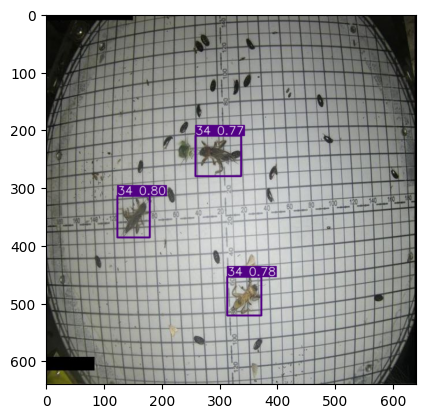

In [67]:
model = YOLO('/content/drive/MyDrive/runs/detect/train2/weights/best.pt')

# Define path to the image folder
image_folder = '/content/pest24_640/test/images'

# Select a random image from the folder
image_files = os.listdir(image_folder)
random_image_file = random.choice(image_files)
image_path = os.path.join(image_folder, random_image_file)

# Read the selected image
image = cv2.imread(image_path)

# Run inference on the selected image
results = model(image)  # list of Results
results_image = results[0].plot()
plt.imshow(cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))


### Evaluation on the Test Data

In [ ]:
# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/MyDrive/runskk/detect/train2/weights/best.pt')  # load a custom model

# the evaluation on the test data

# Validate the model
metrics = model.val()  
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

# Reference To Dataset: 

https://universe.roboflow.com/new-workspace-ug64a/pest24_640-gn5re/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true